In [32]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact
import warnings

warnings.simplefilter('ignore')

In [33]:
# load the dataset
df=pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


# 1. Data Wrangling

In [34]:
# check for null values in the dataset
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

There are no empty value in the dataset

In [35]:
# check for duplicate data in the dataset
df.duplicated().sum()

0

In [36]:
# using info function to get the  features data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


Since there were no null and duplicate values in the dataset there was no need of treating missing and incorrect data

Treating the missing and incorrect data depends on what is the goal of the analysis. Sometimes there might be very less missing data which doesn't affect much of the data analysis process and in that case deletion can be performed. And another method to handle the missing or incorrect data is data imputation. Imputation can be done by various methods they are Mean, Mode , mdeian imputation or Regression Imputation.  In Mean Imputation the data are filled with the average value of whole columns whereas In Mode missing data are filled with the most repeated values in the feature. For mean imputation it is necessary for the columns to be numeric whereas Mode Imputation can be used to fill the categorical null values. In median imputation the strategy is to impute the missing value with the median value.

Regression Imputation is the process of imputing the missing value by predicting the missng values using the available data. It is similar to the linear model which predict the future values using the regression line.

In [37]:
# checking for skewness
df.select_dtypes('number').skew()

Unit     1.08555
Sales    1.08555
dtype: float64

In [38]:
# Normlaizing the sales and unit features using min-max scaling

df['Sales_normalized'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
df['Unit_normalized'] = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())

In [39]:
df['Sales_normalized'].describe()

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales_normalized, dtype: float64

In [40]:
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_normalized,Unit_normalized
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


d. Share your insights regarding the application of the GroupBy() function for 
either data chunking or merging, and offer a recommendation based on 
your analysis.

Based on the problem statement and the business requirement groupby state and Group is preferred in this analysis as the aim is to give the insights of the sales based on the state and group.

# 2. Data analysis`

In [41]:
df.describe()

,Unit,Sales,Sales_normalized,Unit_normalized
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


from the above descriptive analysis of numeric data it was found that:

* the maximum number of sales was 162500 and maximum number of unit sold was 65

* Count represent that the count is 7560 for both Unit and sales which means there are 7560 observation data points

* The average unit sold was 18.005 

*the average Sales was $45013.55 

* Standard deviation STD indicates that on unit 12.901 std means moderate variability in the number of units sold

* Std of Sales indicates that the sales amounts vary around the mean and there is considerate amount of variability in the dataset.

b. Identify the group with the highest sales and the group with the lowest 
sales based on the data provided

In [42]:
group_state=df.groupby('State')['Sales'].sum()
group_state.sort_values(ascending=False)

State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64

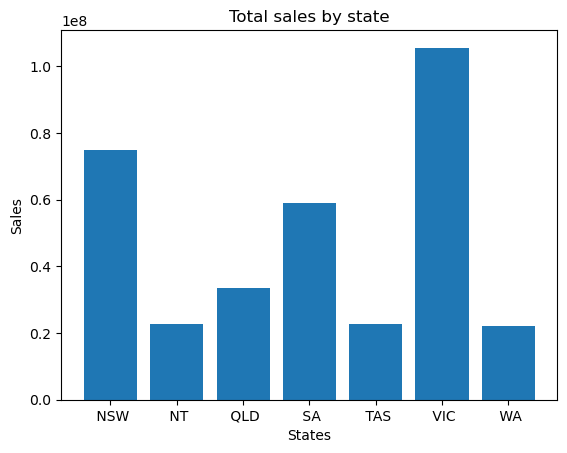

In [43]:
# plotting for better visualization
plt.bar(group_state.index,group_state.values)
plt.title("Total sales by state")
plt.xlabel("States")
plt.ylabel("Sales")
plt.show()

It seems that VIC state has the highest sales whereas WA state has the lowest sales

In [44]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Sales_normalized',
       'Unit_normalized'],
      dtype='object')

In [45]:
# group by group
group_group=df.groupby('Group')['Sales'].sum()
group_group.sort_values(ascending=False)

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

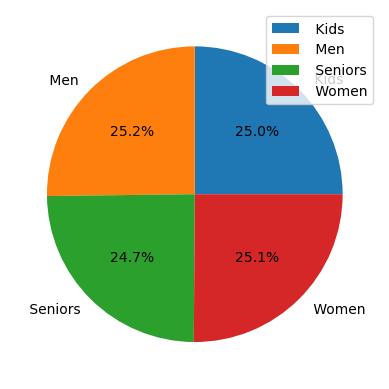

In [46]:
# plotting for better visualization
# plt.pie(group_group.index,group_group.values)
# plt.title("Total sales by Group")
# plt.xlabel("Group")
# plt.ylabel("Sales")
# plt.show()
plt.pie(group_group.values, labels=group_group.index, autopct='%1.1f%%')
plt.legend()
plt.show()

Among all the groups Mens items are the most selling items whereas Seniors is the lowest selling items

On the overall evaluation all the group has quite equal sales as each of them are contributing quit good sales.

d. Generate weekly, monthly, and quarterly reports to document and 
present the results of the analysis conducted.

In [47]:
# seperating the months from the date to analyse the monthly sales and report
df['month']=df['Date'].dt.month
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_normalized,Unit_normalized,month
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,10
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,10
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,10
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,10
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,10


In [48]:
# resampling the data to weekly, monthly and quaterly frequencies
daily_report=df.resample('D', on='Date').sum()
weekly_report = df.resample('W', on='Date').sum()
monthly_report = df.resample('M', on='Date').sum()
quarterly_report = df.resample('Q', on='Date').sum()

# Print the reports
print("Daily Report:")
print(daily_report)

print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

print("\nQuarterly Report:")
print(quarterly_report)

Daily Report:
            Unit    Sales  Sales_normalized  Unit_normalized  month
Date                                                               
2020-10-01  1488  3720000         20.952381        20.952381    840
2020-10-02  1486  3715000         20.920635        20.920635    840
2020-10-03  1556  3890000         22.031746        22.031746    840
2020-10-04  1488  3720000         20.952381        20.952381    840
2020-10-05  1545  3862500         21.857143        21.857143    840
...          ...      ...               ...              ...    ...
2020-12-26  1886  4715000         27.269841        27.269841   1008
2020-12-27  1855  4637500         26.777778        26.777778   1008
2020-12-28  1838  4595000         26.507937        26.507937   1008
2020-12-29  1843  4607500         26.587302        26.587302   1008
2020-12-30  1836  4590000         26.476190        26.476190   1008

[91 rows x 5 columns]
Weekly Report:
             Unit     Sales  Sales_normalized  Unit_normalized  

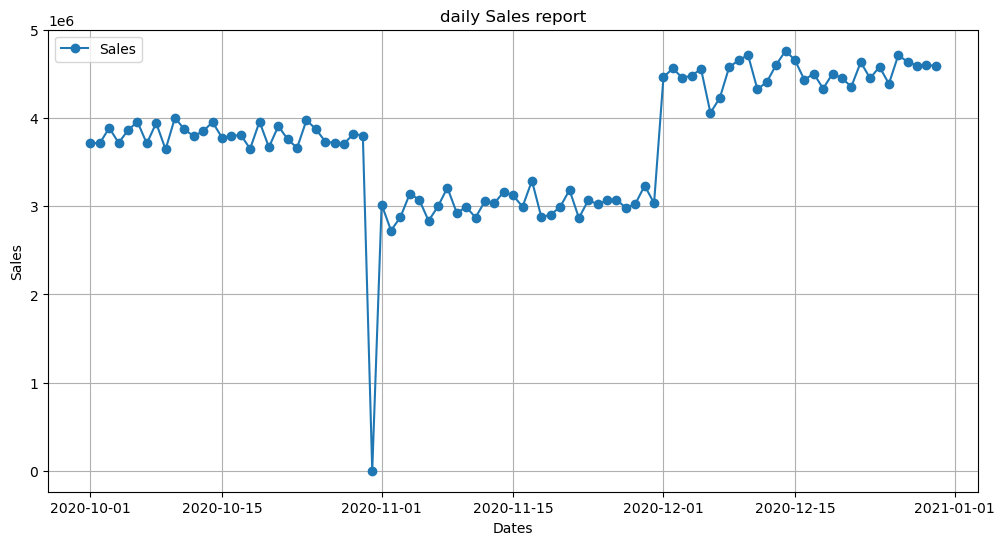

In [49]:
# function to show daily sales for future use
def daily_sales_report():
    # weekly sales report visualization
    plt.figure(figsize=(12,6))
    plt.plot(daily_report['Sales'], label='Sales', marker='o')

    plt.title("daily Sales report")
    plt.xlabel('Dates')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()
    
daily_sales_report()

In [50]:
# plotting the charts for better visualization
# creating a function for future use

def weekly_sales_report():
    # weekly sales report visualization
    plt.figure(figsize=(12,6))
    plt.plot(weekly_report['Sales'], label='Sales', marker='o')

    plt.title("Weekly Sales report")
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

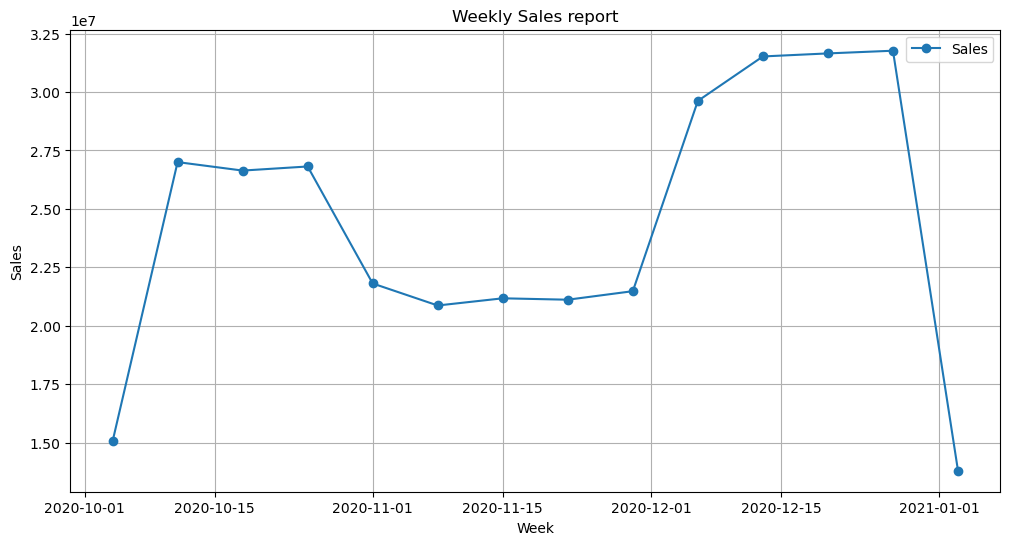

In [51]:
weekly_sales_report()

In [52]:
# function to show monthly sales
def monthly_sales_report():
    # monthly sales report visualization
    plt.figure(figsize=(12,6))
    plt.plot(monthly_report['Sales'], label='Sales', marker='o')

    plt.title("Monthly Sales report")
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

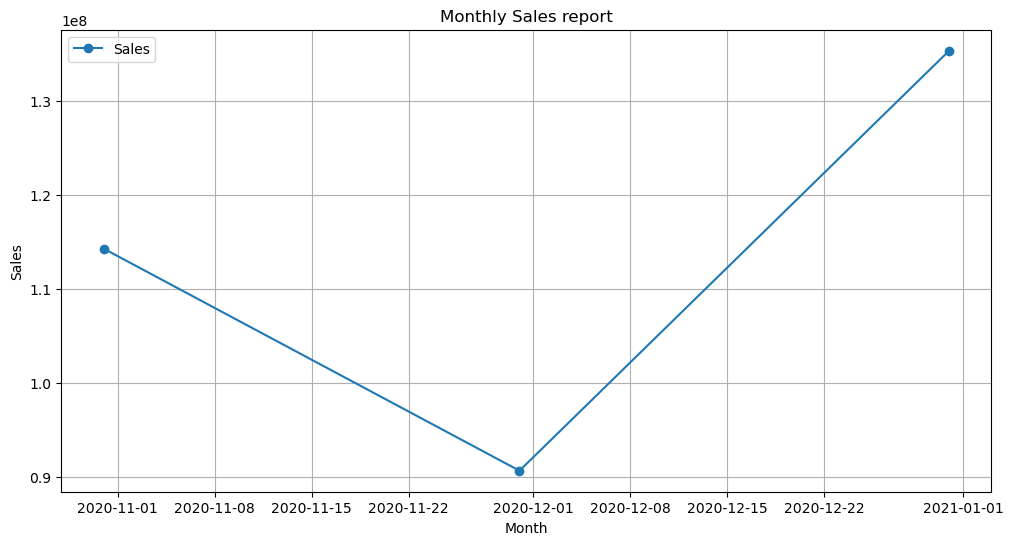

In [53]:
monthly_sales_report()

In [54]:
# function to visualize the weekly unit sales 
def weekly_unit_sales():
    plt.figure(figsize=(12,6))
    plt.plot(weekly_report['Unit'], label='Unit', marker='o')

    plt.title("Weekly unit sold report")
    plt.xlabel('Week')
    plt.ylabel('unit')
    plt.legend()
    plt.grid(True)
    plt.show()

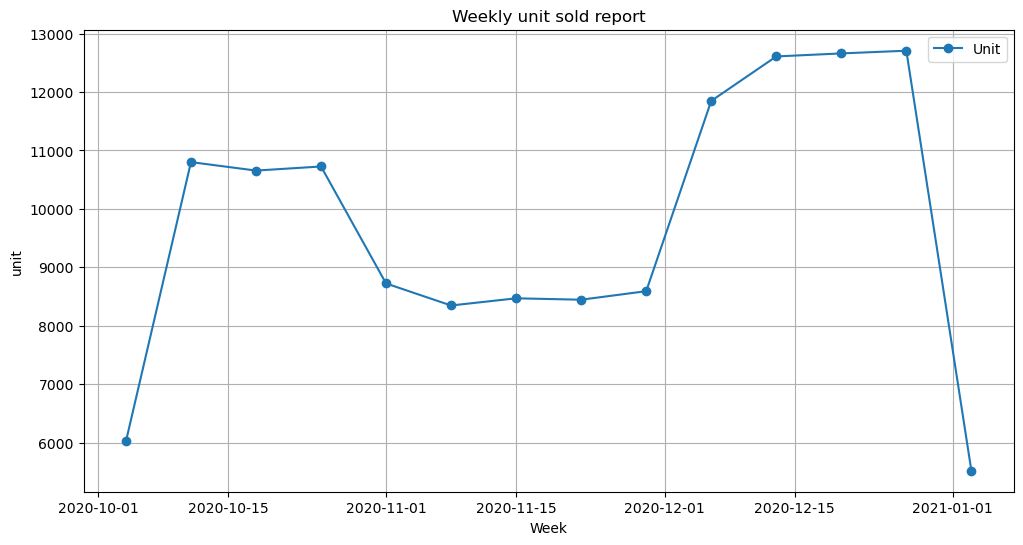

In [55]:
weekly_unit_sales()

Based on the above chart the sales on the weeks of the october month the sales tooks a huge hike from 6000 sales to around 10000 and 11000.

But on the the November month the sales took a drop to 9000 sales per week and in the November month the sales was in the range if 8000 t 9000.

Then on the December month the sales took a huge hike to 12000 sales and the sales keeps increasing.

There might be a multiple reasons why the sales are going up and down some of the most common reason are festival offers, Shop clearance sales and soon

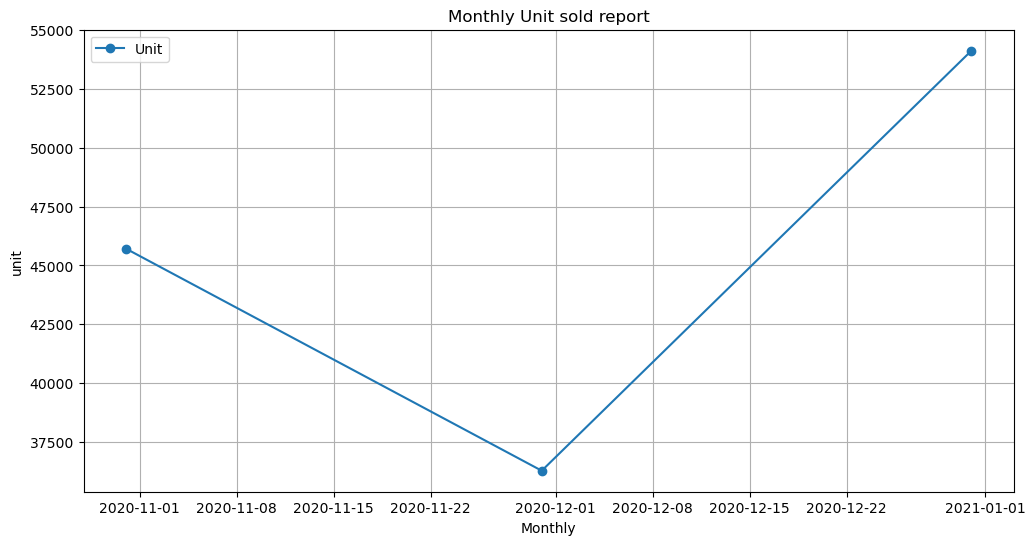

In [56]:
# function to show monthly unit sales 

def monthly_unit_sales():
    # monthly unit sales chart
    plt.figure(figsize=(12,6))
    plt.plot(monthly_report['Unit'], label='Unit', marker='o')

    plt.title("Monthly Unit sold report")
    plt.xlabel('Monthly')
    plt.ylabel('unit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
monthly_unit_sales()

The total sales based on the months are as follow:

    2020-10-31    114290000
    2020-11-30     90682500
    2020-12-31    135330000
Total unit sold are :

    Date
    2020-10-31    45716
    2020-11-30    36273
    2020-12-31    54132

# 3 Data visualization¶
a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:

State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.

Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyperpersonalization and Next Best Offers to enhance sales.

In [57]:
# State wise sales analysis for different demographic groups
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Sales_normalized',
       'Unit_normalized', 'month'],
      dtype='object')

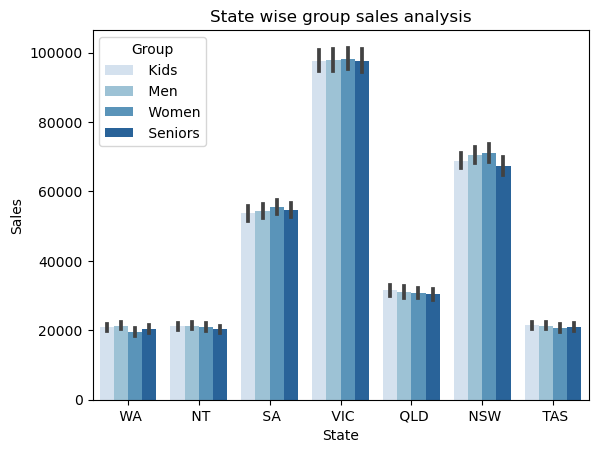

In [58]:
# using seaborn to visualize the statewise sales analysis
sns.barplot(data=df, x='State', y='Sales', hue='Group', palette='Blues')
plt.title('State wise group sales analysis')
plt.show()

Based on the sales by state the most sales is done in VIC state where all group has quite good number of sales. Then followed by NSW and SA state.

The lowest sales are done on WA, NT, TAS where the average sales is 20000.

 Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across 
Various States

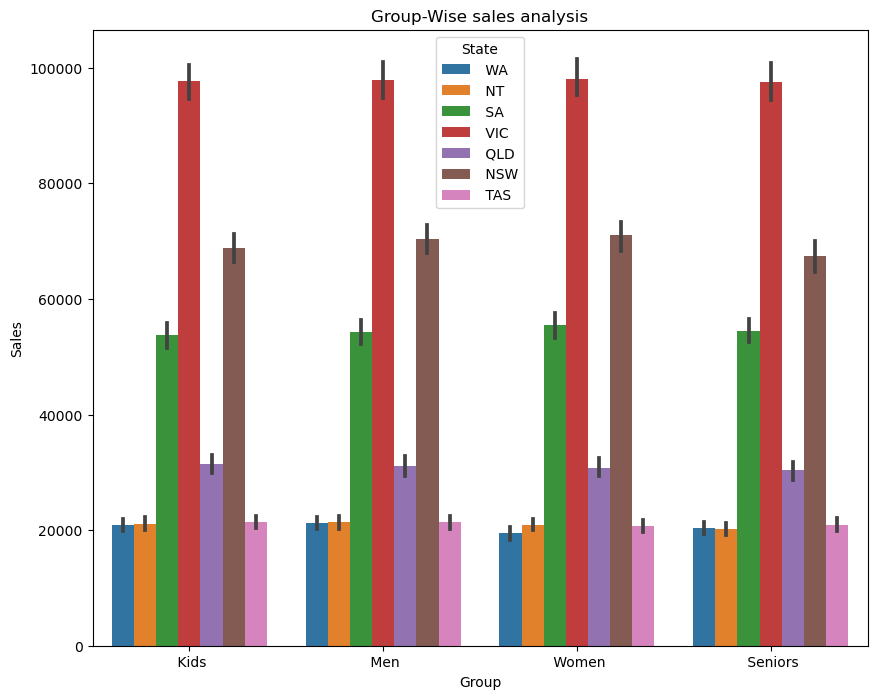

In [59]:
# plotting group-wise sales analysis
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Group', y='Sales', hue='State')
plt.title("Group-Wise sales analysis")
plt.show()

Time-of-the-Day Analysis: Identify peak and off-peak sales periods 
to facilitate strategic planning for S&M teams. This information aids 
in designing programs like hyperpersonalization and Next Best 
Offers to enhance sales

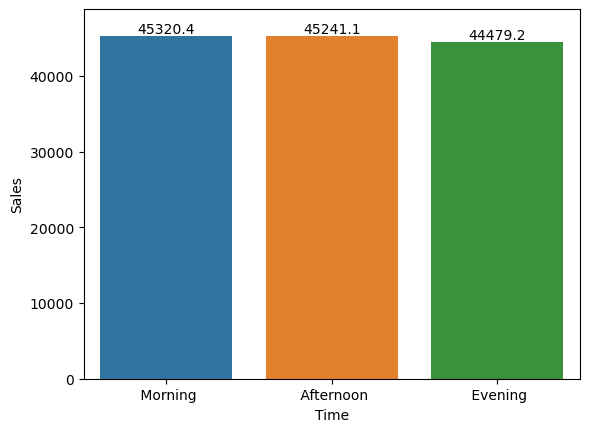

In [60]:
# using the Time feature to identify the peak and off-peak sales period to facilliate strategic planning for S&M teams
ax=sns.barplot(data=df, x='Time', y='Sales',errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

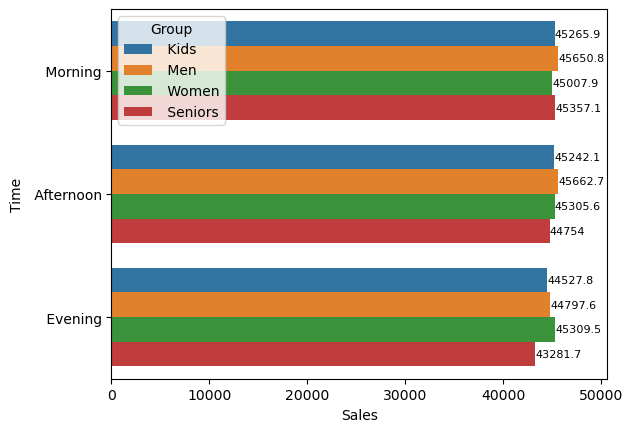

In [61]:
# using the Time feature to identify the peak and off-peak sales by group period to facilliate strategic planning for S&M teams
ax=sns.barplot(data=df, x='Sales', y='Time',hue='Group',errwidth=0, orient='h')
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

By the above visulaization each time has good sales and each Time has done quite same amount of sales in all groups

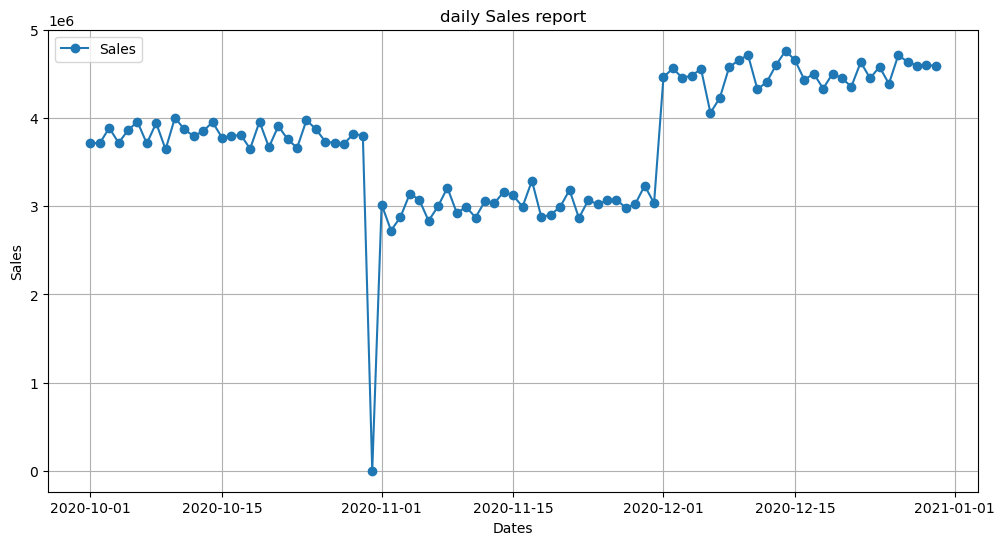

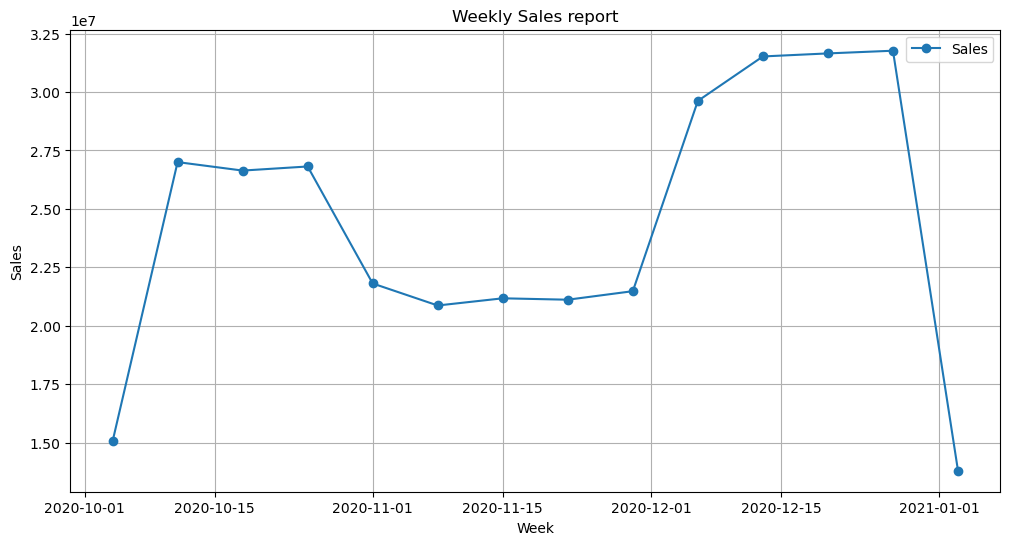

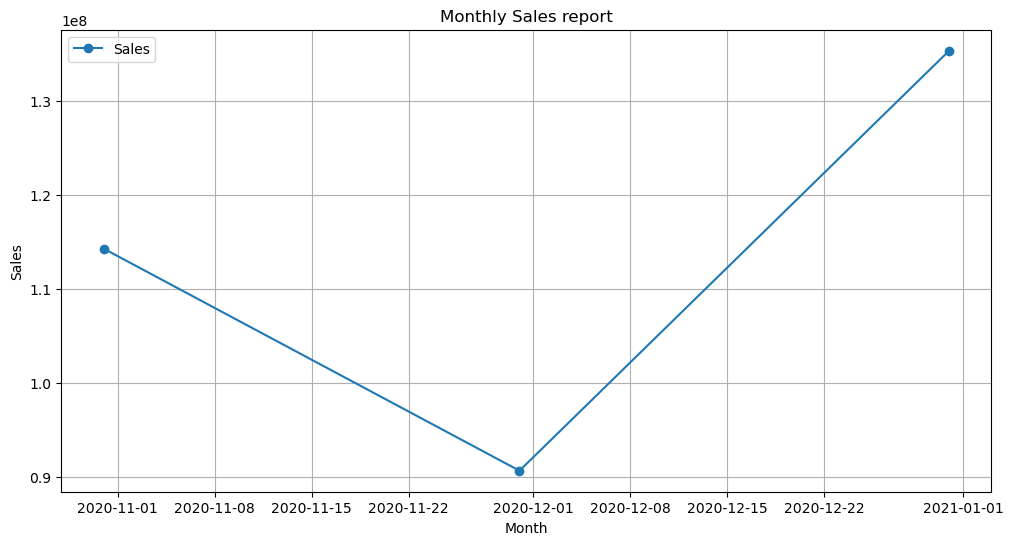

In [68]:
# daily report
daily_sales_report()


# weekly report
weekly_sales_report()

# monthly report
monthly_sales_report()

# Quarterly report

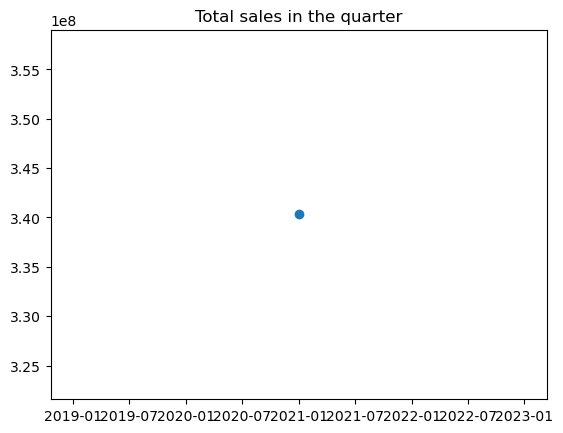

In [69]:
plt.plot(quarterly_report['Sales'], marker='o')
plt.title("Total sales in the quarter")
plt.show()


Due to insufficient data quarterly report is only showing like above where the quarterly sales till the data is 3.40*1e8

In [70]:
quarterly_report

,Unit,Sales,Sales_normalized,Unit_normalized,month
Date,,,,,
2020-12-31,136121,340302500,1920.650794,1920.650794,83160


# finding the relation between sales and other features

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
# create instance of the label encoder
labelEncoder=LabelEncoder()

In [73]:
# perform label encoding on Group, State, Time

df['Group_lbl']=labelEncoder.fit_transform(df['Group'])
df['State_lbl']=labelEncoder.fit_transform(df['State'])
df['Time_lbl']=labelEncoder.fit_transform(df['Time'])

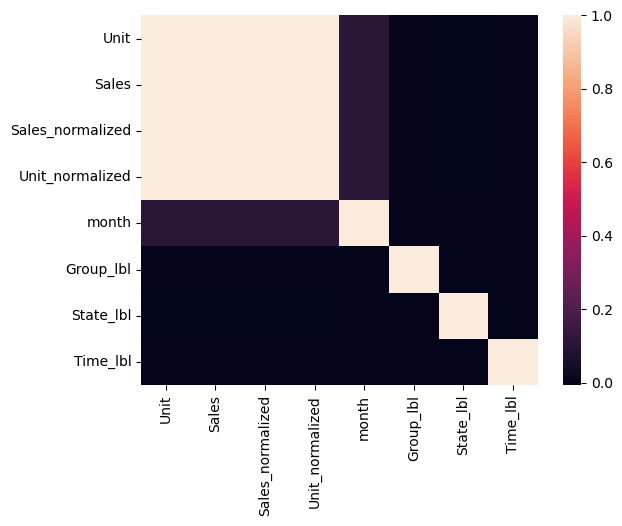

In [74]:
# finding the features which impact the sales
corr_matrix=df.corr()
sns.heatmap(corr_matrix)
plt.show()

From the above correlation heatmap we can conclude that Sales and Unit have a relationship between each other.